# Table of Contents
 <p><div class="lev1 toc-item"><a href="#積分(int)" data-toc-modified-id="積分(int)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>積分(int)</a></div><div class="lev2 toc-item"><a href="#単純な積分(int)" data-toc-modified-id="単純な積分(int)-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>単純な積分(int)</a></div><div class="lev2 toc-item"><a href="#Integralいろいろ" data-toc-modified-id="Integralいろいろ-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Integralいろいろ</a></div><div class="lev3 toc-item"><a href="#部分積分(integration-by-parts)" data-toc-modified-id="部分積分(integration-by-parts)-121"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>部分積分(integration by parts)</a></div><div class="lev2 toc-item"><a href="#置換(change-of-variables)による積分" data-toc-modified-id="置換(change-of-variables)による積分-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>置換(change of variables)による積分</a></div><div class="lev4 toc-item"><a href="#部分分数(partial-fraction)展開による積分" data-toc-modified-id="部分分数(partial-fraction)展開による積分-1301"><span class="toc-item-num">1.3.0.1&nbsp;&nbsp;</span>部分分数(partial fraction)展開による積分</a></div><div class="lev2 toc-item"><a href="#課題" data-toc-modified-id="課題-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>課題</a></div><div class="lev3 toc-item"><a href="#不定積分" data-toc-modified-id="不定積分-141"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>不定積分</a></div><div class="lev3 toc-item"><a href="#定積分:次の定積分を求めよ．" data-toc-modified-id="定積分:次の定積分を求めよ．-142"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>定積分:次の定積分を求めよ．</a></div><div class="lev3 toc-item"><a href="#(発展課題，重積分）次の2重積分を求めよ．" data-toc-modified-id="(発展課題，重積分）次の2重積分を求めよ．-143"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>(発展課題，重積分）次の2重積分を求めよ．</a></div><div class="lev3 toc-item"><a href="#解答例" data-toc-modified-id="解答例-144"><span class="toc-item-num">1.4.4&nbsp;&nbsp;</span>解答例</a></div>

<br />

<div style="text-align: center;">
<font size="7">積分(integral)</font>
</div>
<br />
<div style="text-align: right;">
<font size="4">file:/~/python/doing_math_with_python/differential.ipynb</font>
<br />
<font size="4">cc by Shigeto R. Nishitani 2017 </font>
</div>


# 積分(int)


## 単純な積分(int) 


単純な不定積分．
$$
\int \ln x\, dx = x \ln x -x
$$

In [3]:
from sympy import *
x,y = symbols('x y')

integrate(ln(x),x)

x*log(x) - x

定積分を実行するには，積分変数の範囲を指定する．
$$
\int_{-\pi}^0 \sin x \, dx = -2
$$

In [4]:
integrate(sin(x),(x,-pi,0))

-2

特異点をもつ場合にも適切に積分結果を求めてくれ...

$$
\int_0^2 \frac{1}{\sqrt{x(2-x)}} dx = \pi
$$


In [8]:
integrate(1/sqrt(x*(2-x)),(x,0,2))

Integral(1/sqrt(x*(-x + 2)), (x, 0, 2))

だめみたいですね．どこで引っかかっているかは不明．


無限区間(infinity)における定積分は計算してくれる．
$$
\int_{-\infty}^{\infty} \frac{1}{x^2+4} dx = \frac{\pi}{2}
$$


In [4]:
integrate(1/(x**2+4),(x, -oo, oo))

pi/2

部分積分法や置換積分法を用いる必要のある複雑な積分も一発で求まる．
$$
{\rm eq}\, = \, \sqrt{4-{x}^{2}} \notag \\
\int {\rm eq}\,  dx = \frac{1}{2}\,x \sqrt{4-{x}^{2}}+2\,\arcsin \left( 1/2\,x \right) \notag
$$

In [5]:
eq=sqrt(4-x**2)
integrate(eq,x)

x*sqrt(-x**2 + 4)/2 + 2*asin(x/2)

数学の公式集を見ないとわからないような積分も同じコマンドで求まる．
$$
{\rm eq2}\, = \,\exp({-{x}^{2}}) \notag \\
\int_0^{zz} {\rm eq}\,  dx = \frac{1}{2}\, \sqrt{\pi }\, \mbox{erf} \left(zz\right) \notag
$$

In [9]:
zz = symbols('zz')
eq2=exp(-x**2)
integrate(eq2, (x,0,zz))

sqrt(pi)*erf(zz)/2

## Integralいろいろ

ちょっとぐらい難しい積分も，sympyは単純にintegrateコマンドだけで実行してくれます．
しかし，時には，途中の計算法である部分積分，置換積分，部分分数展開が必要になかもしれません．
これらはIntegralというパッケージに幾つか用意されているようです．詳しくは[サイト](http://docs.sympy.org/latest/modules/integrals/integrals.html)を参照してください．

残念ながら部分積分(integration by parts)の途中を見るコマンドはなさそう．

### 部分積分(integration by parts) 

$$
\int x \exp(x)\, dx = x\exp(x)-\int \exp(x)\, {dx}
$$

mapleでは，
```maple
> intparts(Int(x*exp(x),x),x);
```

sympyでは，こいつはなさそう．

## 置換(change of variables)による積分 

コマンドtransformを使う．
$$
\int \left( \cos \left( x \right) +1 \right) ^{3}\sin \left( x \right) {dx} \notag
$$
これを$cos(x)+1=u$として置換すると．
$$
\int-{u}^{3}{du}
$$
となる．

```maple
> Int((cos(x)+1)^3*sin(x), x);
> changevar(cos(x)+1=u, Int((cos(x)+1)^3*sin(x), x=a..b), u);
> changevar(cos(x)+1=u, int((cos(x)+1)^3*sin(x), x), u);
```
$$
\int \left( \cos \left( x \right) +1 \right) ^{3}\sin \left( x \right) {dx} \notag \\
\int _{\cos \left( a \right) +1}^{\cos \left( b \right) +1}-{u}^{3}{du} \notag \\
-\frac{1}{4}\,{u}^{4} \notag \\
$$



In [37]:
a,b,u = symbols('a b u')

i = Integral((cos(x)+1)**3*sin(x),x)
pprint(i.transform(cos(x)+1,u))

⌠       
⎮   3   
⎮ -u  du
⌡       


定積分(x=1..2)を実行すると，以下のようになる．ただし，$-u^3 \rightarrow u^3$は積分範囲が反対向けになっているのに注意．

In [39]:
i = Integral((cos(x)+1)**3*sin(x),(x,1,2))
pprint(i.transform(cos(x)+1,u))
integrate(u**3, (u, cos(2) + 1, cos(1) + 1))

cos(1) + 1      
    ⌠           
    ⎮       3   
    ⎮      u  du
    ⌡           
cos(2) + 1      


-(cos(2) + 1)**4/4 + (cos(1) + 1)**4/4

#### 部分分数(partial fraction)展開による積分 


部分分数(partial fraction)展開による積分では，apartコマンドを用いる．
$$
{\rm pf1}\, = \frac{1}{1+x^3} = \frac{1}{3}\,{\frac {-x+2}{{x}^{2}-x+1}}+ \frac{1}{3\,\left( x+1 \right) } \notag \\
\int {\rm pf1} dx =  -\frac{1}{6}\,\ln  \left( {x}^{2}-x+1 \right) +\frac{1}{3}\, \sqrt{3}\arctan \left( 1/3\, \left( 2\,x-1 \right)  \sqrt{3} \right) +\frac{1}{3}\,\ln  \left( x+1 \right) \notag
$$

In [11]:
eq = 1/(1+x**3)
pprint(apart(eq))

pprint(integrate(apart(eq),x))

      x - 2            1    
- ────────────── + ─────────
    ⎛ 2        ⎞   3⋅(x + 1)
  3⋅⎝x  - x + 1⎠            
                                      ⎛2⋅√3⋅x   √3⎞
                ⎛ 2        ⎞   √3⋅atan⎜────── - ──⎟
log(x + 1)   log⎝x  - x + 1⎠          ⎝  3      3 ⎠
────────── - ─────────────── + ────────────────────
    3               6                   3          


## 課題

###  不定積分

次の不定積分を求めよ．
1. $\int 4\,x+3{dx}$
1. $ \int  \frac{1}{ 1+\mbox{e}^{x} }{dx}$
1. $ \int  \frac{1}{ \mbox{e}^{-x}+\mbox{e}^{x} }{dx}$
1. $ \int  \sqrt{1-{x}^{2}}{dx}$

### 定積分:次の定積分を求めよ．

1. $ \int _{0}^{\pi } \sin x{dx}$
1. $ \int _{0}^{1} \arctan x{dx}$
1. $ \int _{-2}^{2} \frac{1}{ \sqrt{4-{x}^{2}} }{dx}$
1. $ \int _{0}^{1} \frac{1}{ {x}^{2}+x+1 }{dx}$

###  (発展課題，重積分）次の2重積分を求めよ．

$$
\int \int_{D} \sqrt{x^2+y^2}dxdy\,\, D:0\leq y \leq x \leq 1
$$

### 解答例

1.  
```maple
> int(4*x+3,x);
> int( 1/(1+exp(x)),x);
> int(1/(exp(-x)+exp(x)),x);
> int(sqrt(1-x^2),x);
```
$$
2\,{x}^{2}+3\,x  \notag \\
-\ln  \left( 1+ \mbox{e}^x \right) +\ln  \left( \mbox{e}^x \right)  \notag \\
\arctan \left( \mbox{e}^x \right)  \notag \\
\frac{1}{2}\,x \sqrt{1-{x}^{2}}+\frac{1}{2}\,\arcsin \left( x \right)  \notag
$$



In [67]:
from sympy import *
x = symbols('x')

pprint(integrate(4*x+3,x))
pprint(integrate(1/(1+exp(x)),x))
pprint(1/(exp(-x)+exp(x)))
pprint(integrate(1/(exp(-x)+exp(x)),x))
pprint(integrate(sqrt(1-x**2),x))

   2      
2⋅x  + 3⋅x
       ⎛ x    ⎞
x - log⎝ℯ  + 1⎠
   1    
────────
 x    -x
ℯ  + ℯ  
       ⎛   2               ⎛       x⎞⎞
RootSum⎝4⋅z  + 1, i ↦ i⋅log⎝2⋅i + ℯ ⎠⎠
     __________          
    ╱    2               
x⋅╲╱  - x  + 1    asin(x)
─────────────── + ───────
       2             2   


1. 
```maple
> int(sin(x),x=0..Pi);
> int(arctan(x),x=0..1);
> int(1/(sqrt(4-x^(2))),x=-2..2);
> int(1/(x^2+x+1),x=0..1);
```
$$
2   \notag \\
\frac{1}{4}\,\pi -\frac{1}{2}\,\ln  \left( 2 \right)   \notag \\
\pi   \notag \\
\frac{1}{9}\,\pi \, \sqrt{3}  \notag
$$

In [81]:
pprint(integrate(sin(x),(x,0,pi)))
pprint(integrate(atan(x),(x,0,1)))
pprint(integrate(1/sqrt(4-x**2),(x,-2,2)))
pprint(integrate(1/(x**2+x+1),(x,0,1)))

2
  log(2)   π
- ────── + ─
    2      4
π
√3⋅π
────
 9  


こいつの表示はまだわからん．
```maple
> with(plots):
> inequal({x-y>=0,x>=0,x<=1,y>=0},x=-0.5..1.5,y=-0.5..1.5,optionsexcluded=(color=white));
```

![](./figs/Intplot2d1.png)

In [10]:
f = sqrt(x**2+y**2)

In [11]:
integrate(integrate(f,(y,0,x)),(x,0,1))

log(1 + sqrt(2))/6 + sqrt(2)/6

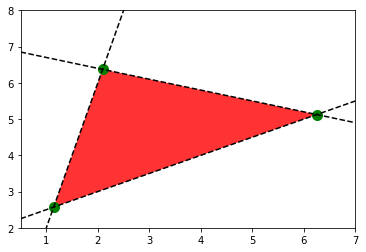

In [3]:
# example in https://stackoverflow.com/questions/17576508/python-matplotlib-drawing-linear-inequality-functions
import numpy as np
import matplotlib.pyplot as plt
from sympy.solvers import solve
from sympy import Symbol

def f1(x):
    return 4.0*x-2.0
def f2(x):
    return 0.5*x+2.0
def f3(x):
    return -0.3*x+7.0

x = Symbol('x')
x1, =  solve(f1(x)-f2(x))
x2, =  solve(f1(x)-f3(x))
x3, =  solve(f2(x)-f3(x))

y1 = f1(x1)
y2 = f1(x2)
y3 = f2(x3)

plt.plot(x1,f1(x1),'go',markersize=10)
plt.plot(x2,f1(x2),'go',markersize=10)
plt.plot(x3,f2(x3),'go',markersize=10)

plt.fill([x1,x2,x3,x1],[y1,y2,y3,y1],'red',alpha=0.8)

xr = np.linspace(0.5,7.5,100)
y1r = f1(xr)
y2r = f2(xr)
y3r = f3(xr)

plt.plot(xr,y1r,'k--')
plt.plot(xr,y2r,'k--')
plt.plot(xr,y3r,'k--')

plt.xlim(0.5,7)
plt.ylim(2,8)

plt.show()

fillplotsというのがあるようだが，python3で動かすとエラーが出る．